#Description 



*   Here, I am going to predict the purchasing amount of customers during Black Friday, using various features such as age, gender, marital status.
*   The dataset is the Black Friday dataset from Kaggle which contains about 550068 rows and 12 features.
*   The dataset contains the labels which needs to be predicted and the labels are continuous. So the problem is a Supervised Regression type.


##1. Import libraries and dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing dataset
train = pd.read_csv('/content/drive/MyDrive/ADS Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ADS Project/test.csv')

##2. Descriptive analysis

In [5]:
# Preview training dataset
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Preview testing dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
# Training dataset dimensions - (rows, columns)
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [8]:
# Testing dataset dimensions - (rows, columns)
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [9]:
# Features data-type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
# Statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [11]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [12]:
# Checking the counts of unique values
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [13]:
# Checking the counts of unique values
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

##Observations


*   The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.
*   The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.

## 3. Exploratory Data Analysis

# 3.1 Univariate Analysis

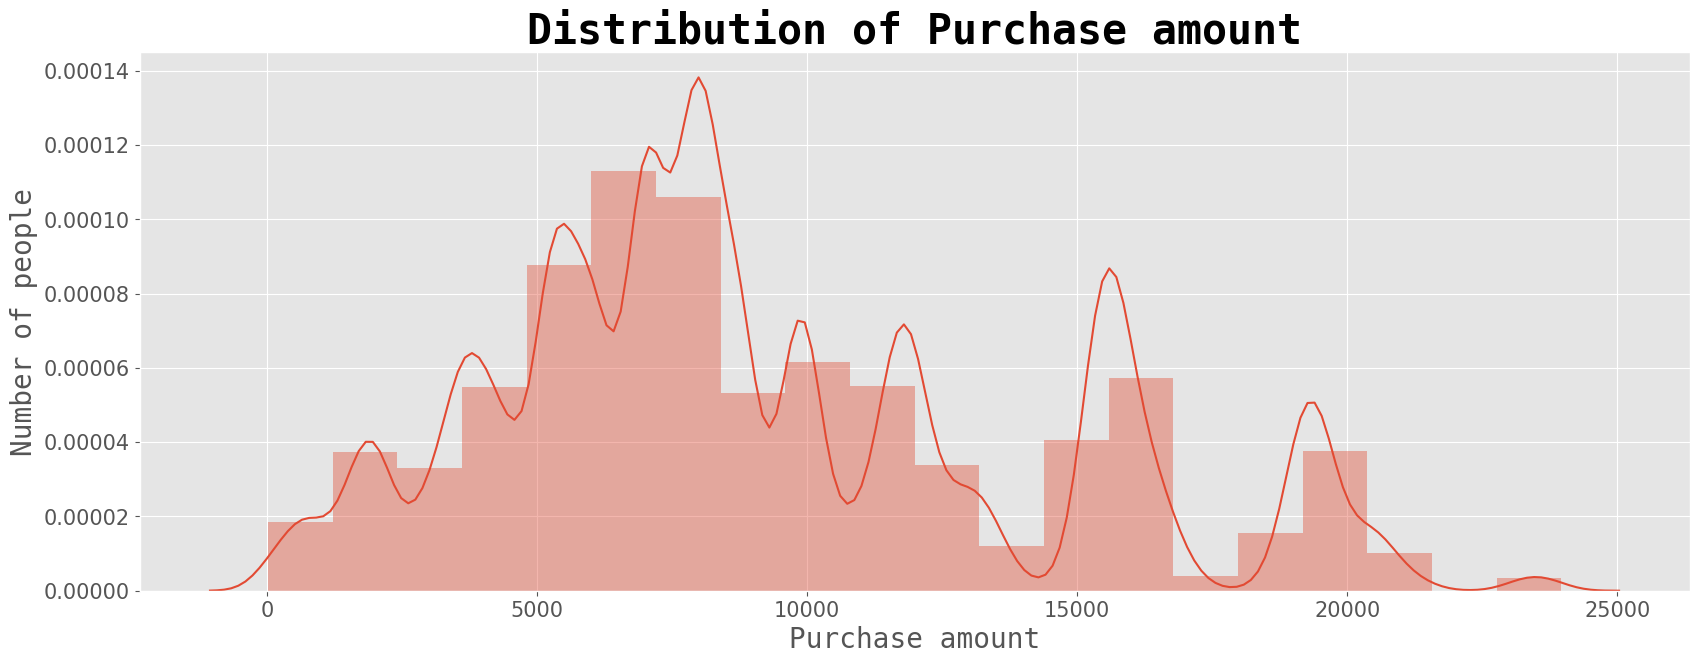

In [90]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

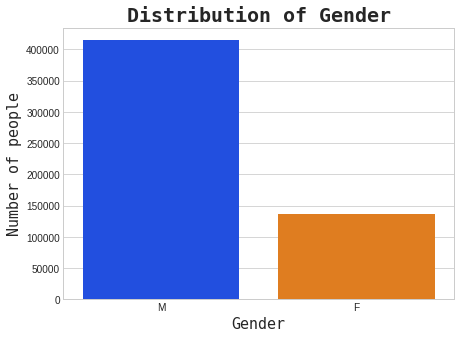

In [15]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

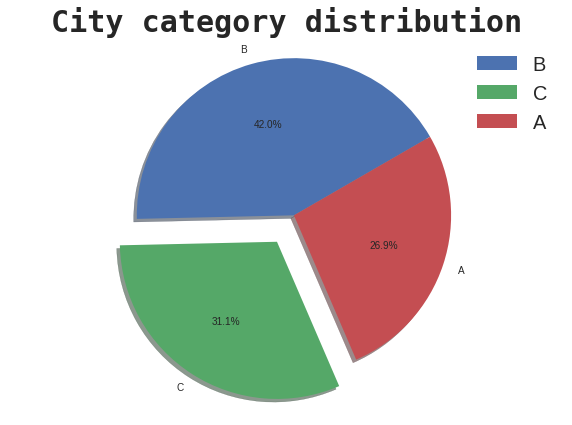

In [16]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

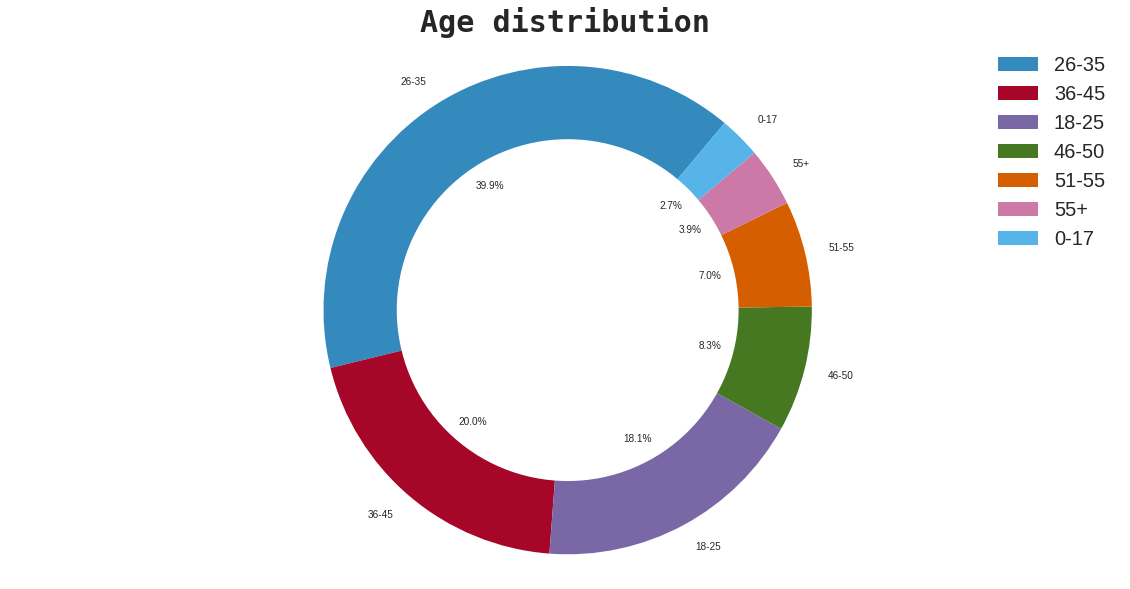

In [17]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

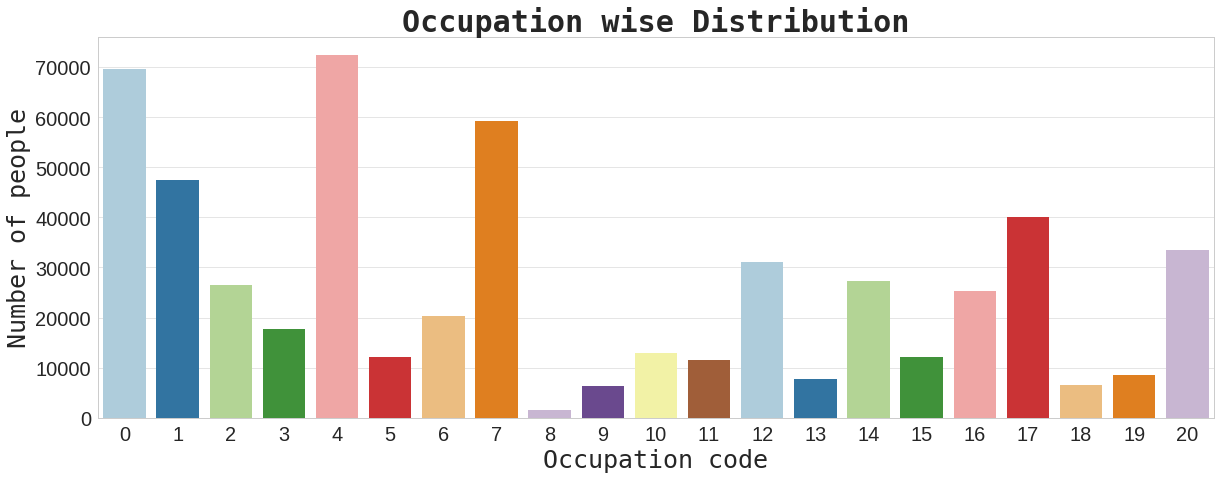

In [18]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

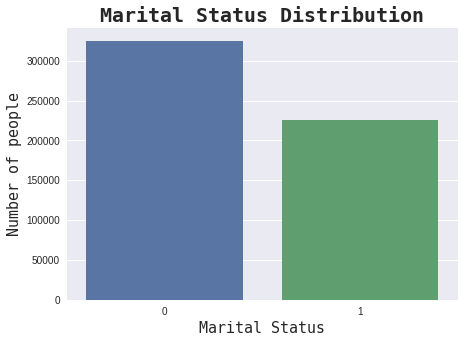

In [19]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

In [21]:
!pip install squarify

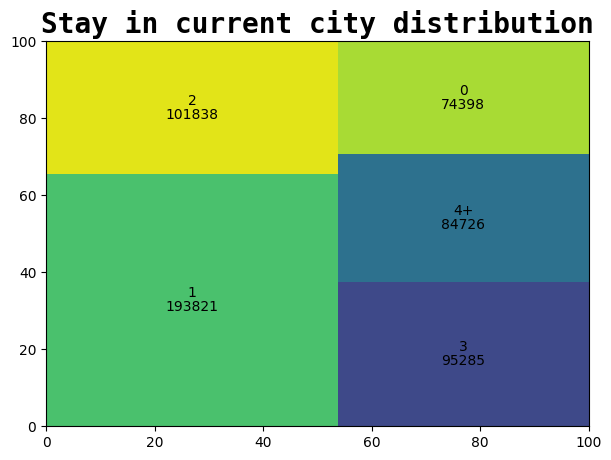

In [22]:
# Creating a Treemap for 'Stay_In_Current_City_Years'
stay = train['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

### 3.2 Bivariate Analysis

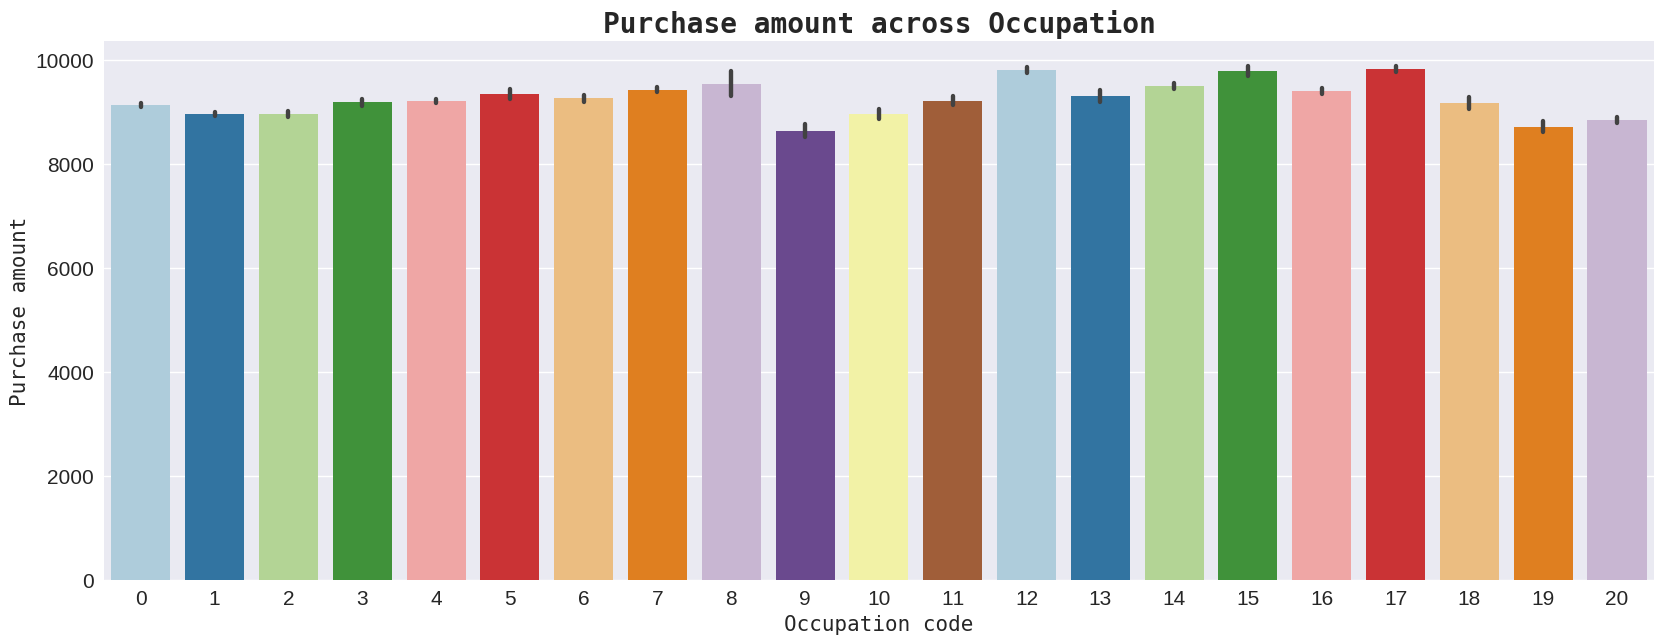

In [23]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

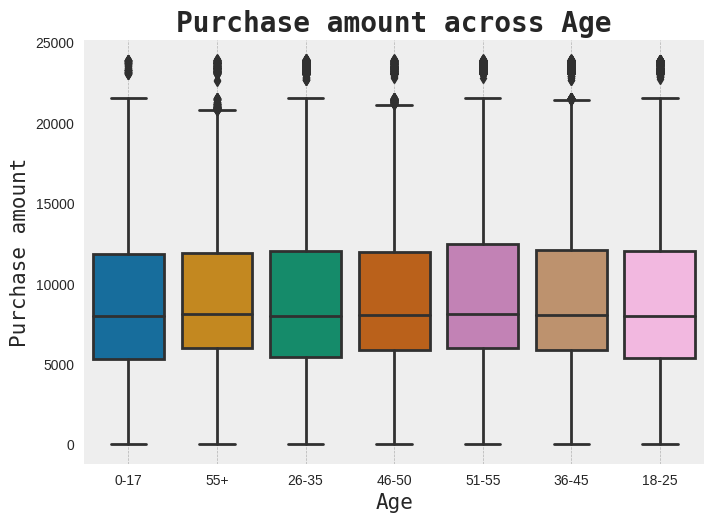

In [24]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

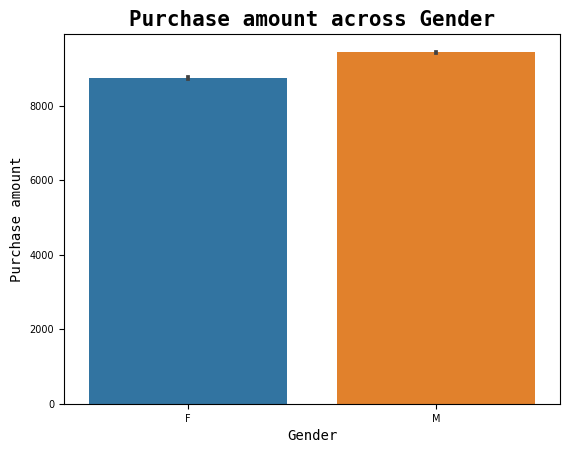

In [25]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default')
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)

plt.show()

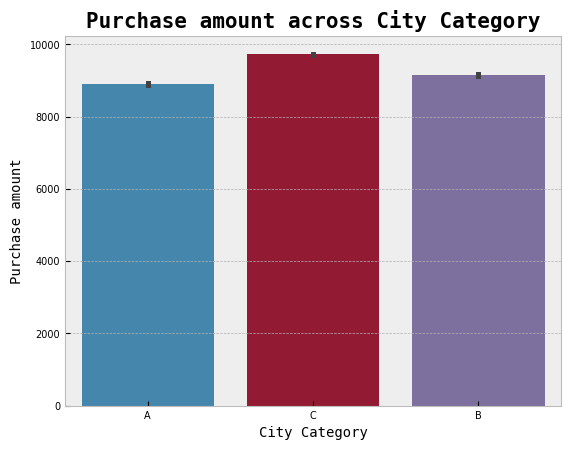

In [26]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

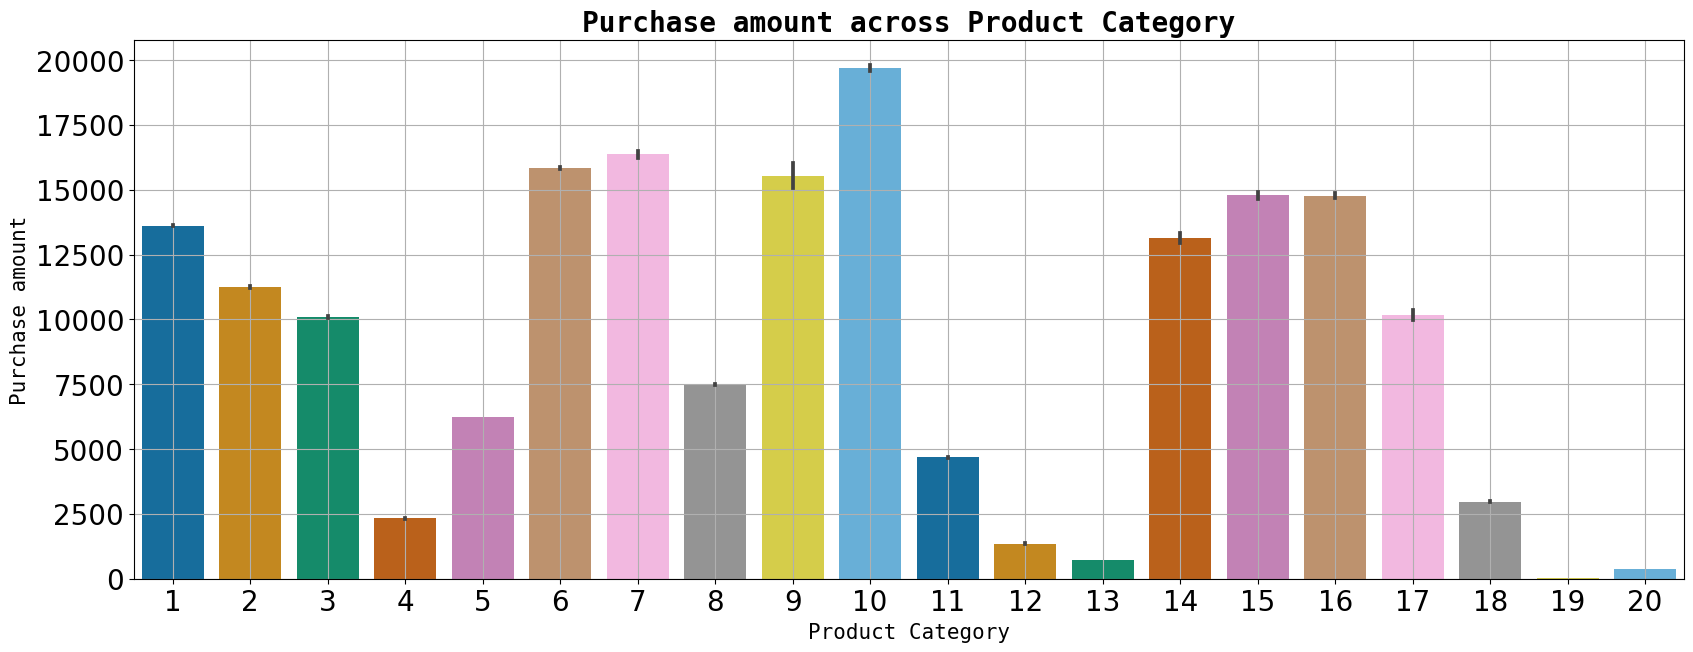

In [27]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

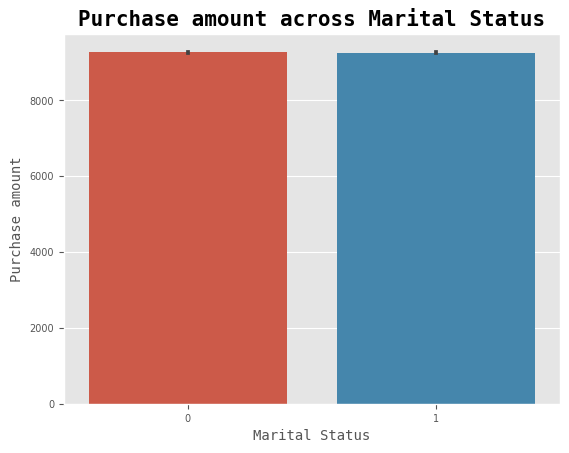

In [28]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

### 3.3 Multivariate Analysis

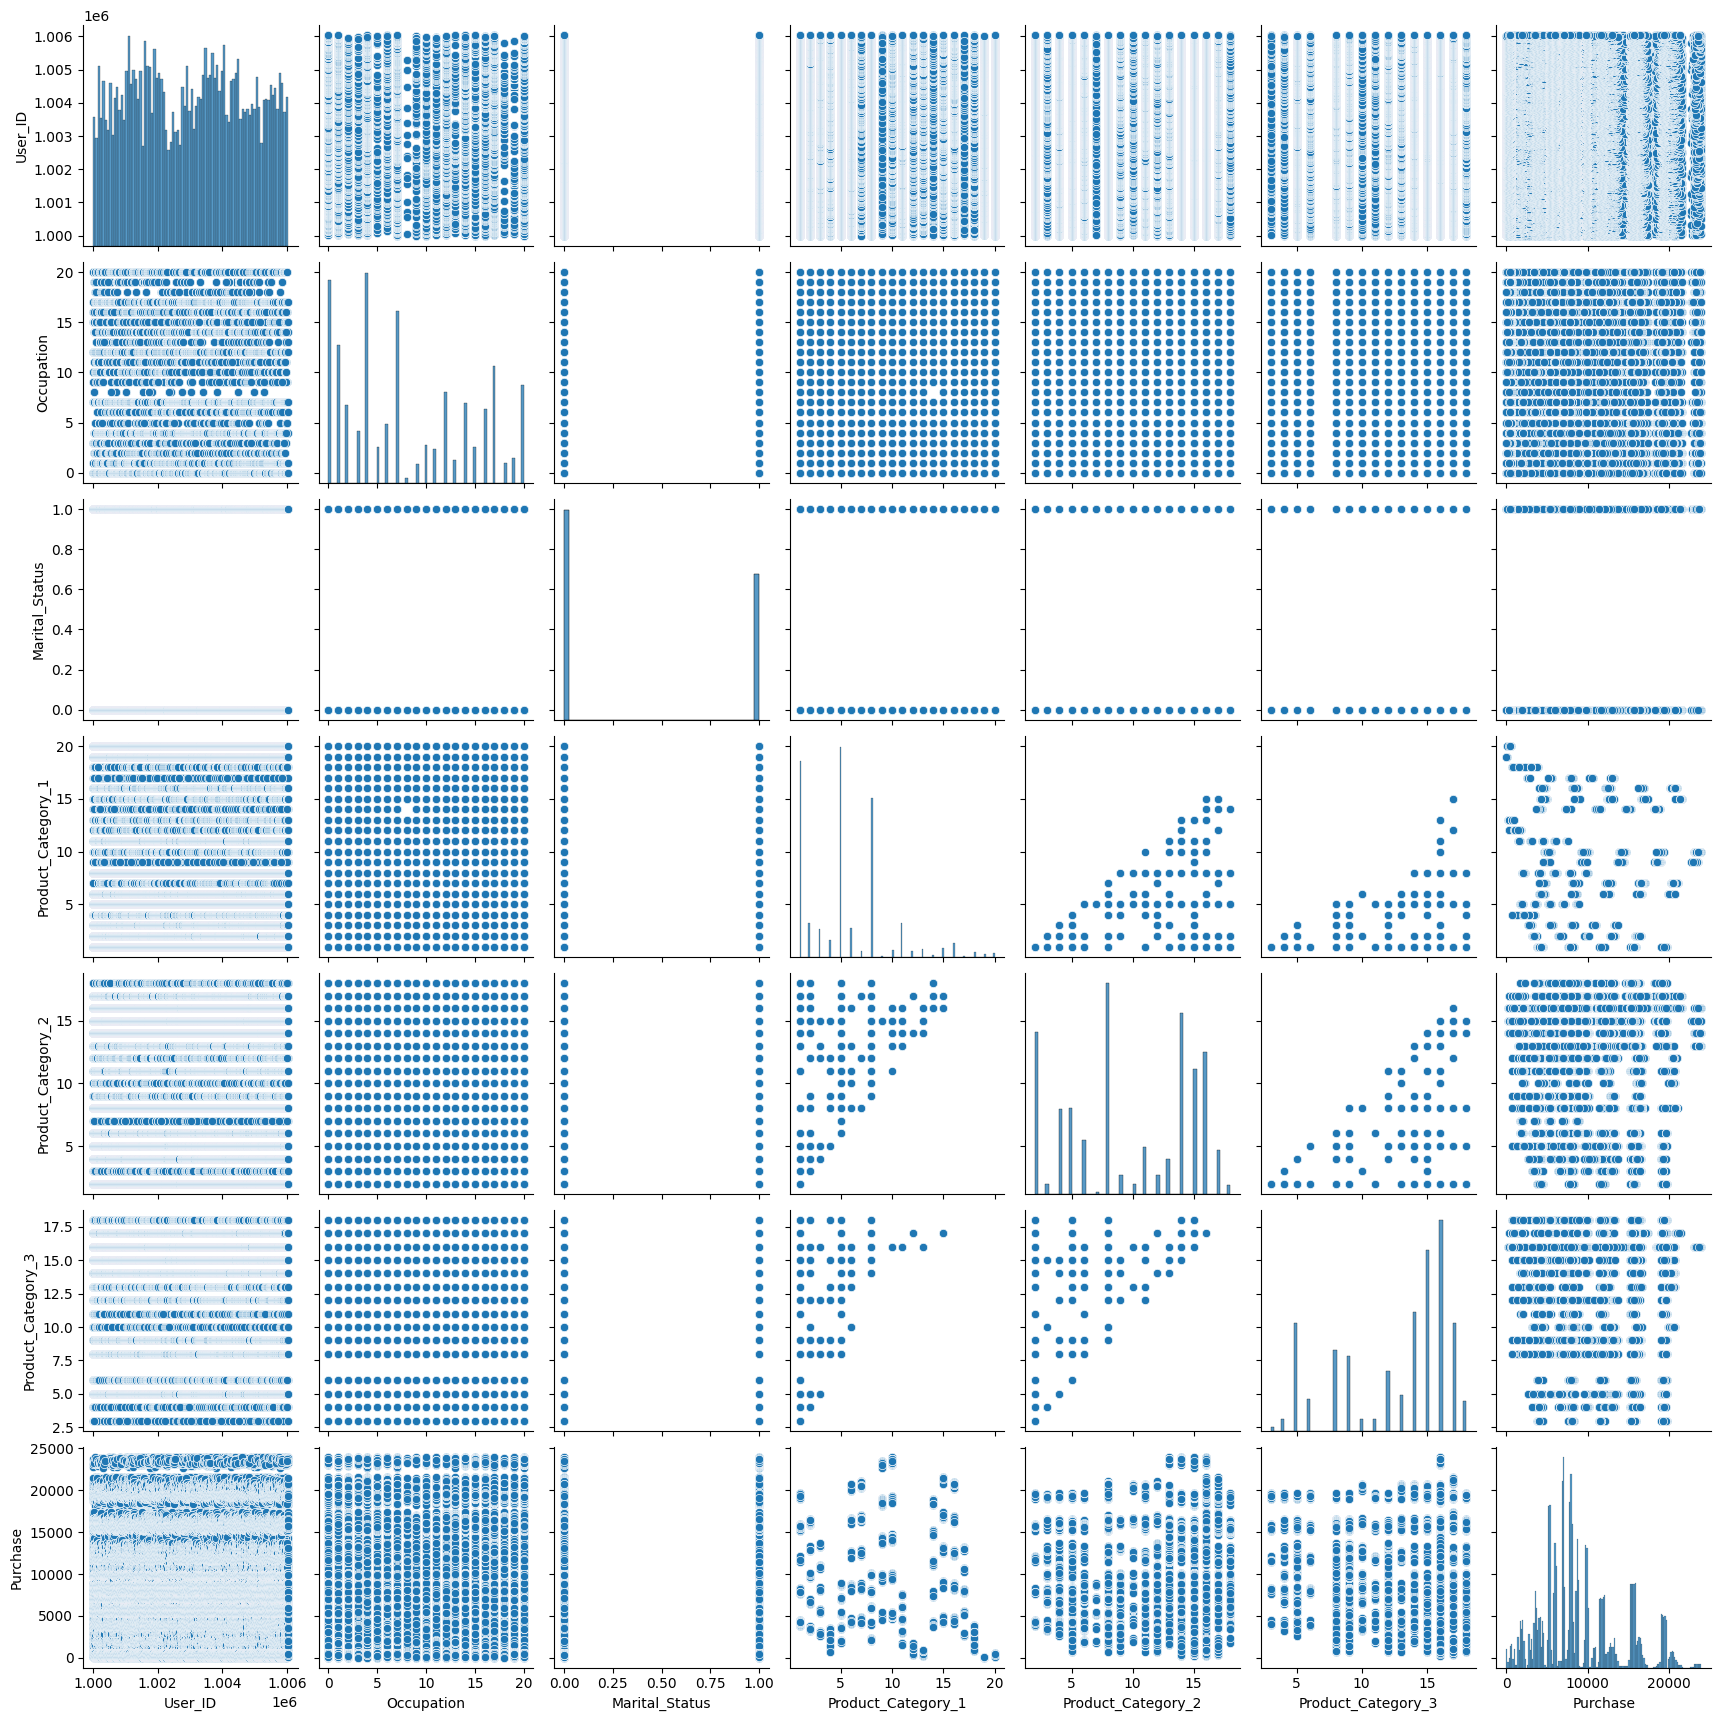

In [29]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

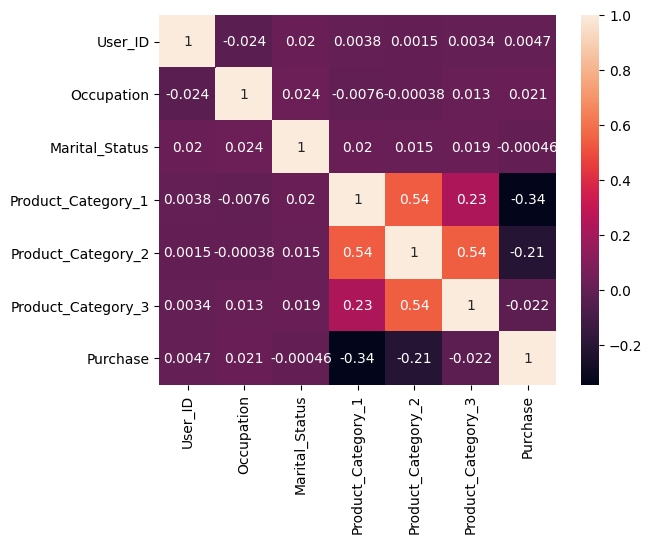

In [30]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.
</p></li>    

</ul>

</div>

## 4. Data preprocessing

### 4.1: Merging of train and test

In [91]:
train['source'] = 'train'
test['source'] = 'test'

In [32]:
dataset = pd.concat([train, test])

### 4.2: Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [33]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [34]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

### 4.3: Dropping irrelevant features

In [35]:
dataset.drop('Product_Category_3', axis = 1, inplace = True)

In [36]:
dataset.drop('User_ID', axis = 1, inplace = True)

In [37]:
dataset.drop('Product_ID', axis = 1, inplace = True)

### 4.4: Feature Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [40]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [41]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

### 4.5: Fixing null values in 'Product_Category_2' 

In [42]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

### 4.6: Convert 'Stay_In_Current_City_Years' into numeric data type

In [43]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

### 4.7: Separating dataset into train and test

In [44]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [45]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

### 4.8: Separating train into X and Y

In [46]:
X = train.drop("Purchase", axis = 1)

In [47]:
Y = train["Purchase"]

### 4.9: Feature Selection

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [49]:
selector.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [50]:
feature_imp = selector.feature_importances_

In [51]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.5
1 2.11
2 4.95
3 0.73
4 2.58
5 0.63
6 79.68
7 8.82


In [52]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

### 4.10: Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 4.11: Creating a train test split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [56]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)


## 5. Data Modelling

### 5.1: Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [58]:
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
Y_pred_lin_reg = lin_reg.predict(X_test)

### 5.2: KNN Regression

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [61]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [62]:
Y_pred_knn = knn.predict(X_test)

### 5.3: Decision Tree Regression

In [63]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [64]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
Y_pred_dec = dec_tree.predict(X_test)

### 5.4: Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [67]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
Y_pred_ran_for = ran_for.predict(X_test)

### 5.5: XGB Regressor

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [70]:
xgb.fit(X_train, Y_train)

[18:15:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [71]:
Y_pred_xgb = xgb.predict(X_test)

## 6. Model Evaluation

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [73]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4699.473872577099
R2 score: 0.12103412745405762


In [74]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))

KNN regression: 
RMSE: 3277.5735280929334
R2 score: 0.5724583579516003


In [75]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3065.457191852455
R2 score: 0.6260065073290599


In [76]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3031.697965232362
R2 score: 0.6341985700754502


In [77]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB regression: 
RMSE: 3024.8703086442342
R2 score: 0.6358443502285505


## 7. Hyperparameter tuning

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [80]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [81]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [82]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [83]:
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamm

In [84]:
xgb_cv.best_score_

0.6512707227919969

In [85]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': '1.0',
 'max_depth': 11,
 'min_child_weight': 66}

In [86]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, verbosity = 0, random_state = 42)

In [87]:
xgb_best.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=11, min_child_weight=66, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [88]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [89]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2985.7374358000807
R2 score: 0.6452055961121277


In this project, I tried to build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression, Random forest and XGB regressor to get the best possible prediction.

The hyperparameter tuned XGB regressor gives the best rmse value and r2 score for this problem.
